In [20]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm


In [ ]:
from google.colab import auth
import gspread
import pandas as pd
from google.auth import default

# Authenticate the Google account
auth.authenticate_user()

# Authorize access
creds, _ = default()
gc = gspread.authorize(creds)

# Use the link you provided to open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1CriTdV_AbQB-gykGVdfIL4VjsCT1iLn24ZAFpvJyWVw/edit?gid=0#gid=0'

# Open the spreadsheet
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first worksheet
worksheet = spreadsheet.sheet1

# Get all the data and convert it to a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,Keyword,american furniture warehouse,american furniture,recliner,american signature furniture,reclining sofa,american signature,american furniture warehouse near me,china cabinets,anthropologie mirror,american home furniture,allswell mattress,bunk a bed,oversized recliners,king bedroom furniture,value city and furniture,twin bed and frame,reclining couches
0,January 2023,301000.0,165000.0,135000.0,60500.0,90500.0,33100.0,9900.0,49500.0,27100.0,12100.0,9900.0,246000.0,18100.0,74000.0,450000.0,110000.0,12100.0
1,February 2023,246000.0,165000.0,110000.0,60500.0,74000.0,33100.0,9900.0,40500.0,18100.0,9900.0,9900.0,246000.0,14800.0,60500.0,450000.0,110000.0,9900.0
2,March 2023,301000.0,165000.0,135000.0,49500.0,74000.0,33100.0,9900.0,40500.0,18100.0,12100.0,12100.0,246000.0,14800.0,60500.0,368000.0,110000.0,9900.0
3,April 2023,246000.0,135000.0,110000.0,49500.0,74000.0,27100.0,9900.0,40500.0,14800.0,9900.0,8100.0,201000.0,12100.0,49500.0,368000.0,110000.0,9900.0
4,May 2023,301000.0,135000.0,110000.0,49500.0,74000.0,33100.0,9900.0,33100.0,14800.0,9900.0,9900.0,201000.0,12100.0,49500.0,368000.0,90500.0,9900.0


In [ ]:
df.shape
df.columns
df.set_index('Keyword', inplace=True)
df_volume=df.drop(index=[ 'Traffic (%)',
                         'Traffic',
                         'Traffic Cost',
                          'Traffic Cost (%)',
                         'Competition',
                         'Search Volume',
                         'Number of Results',
                         'CPC'])

df_volume.index


Index(['January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023',
       'June 2023', 'July 2023', 'August 2023', 'September 2023',
       'October 2023', 'November 2023', 'December 2023', 'January 2024',
       'February 2024', 'March 2024', 'April 2024', 'May 2024', 'June 2024',
       'July 2024'],
      dtype='object', name='Keyword')

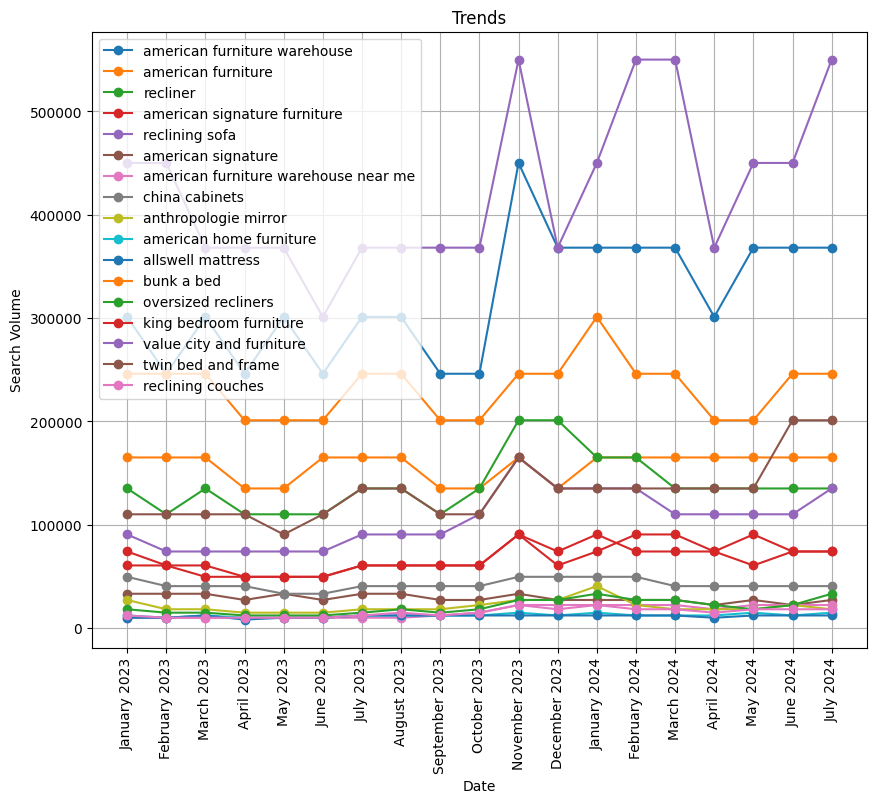

In [ ]:
plt.figure(figsize=(10,8))
for x in df_volume.columns:
  plt.plot(df_volume.index, df_volume[x], label=x, marker='o')

plt.xlabel('Date')
plt.legend(fontsize='small')
plt.ylabel('Search Volume')
plt.title('Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()
df = df.replace('', 0)
sns.pairplot(df_volume)

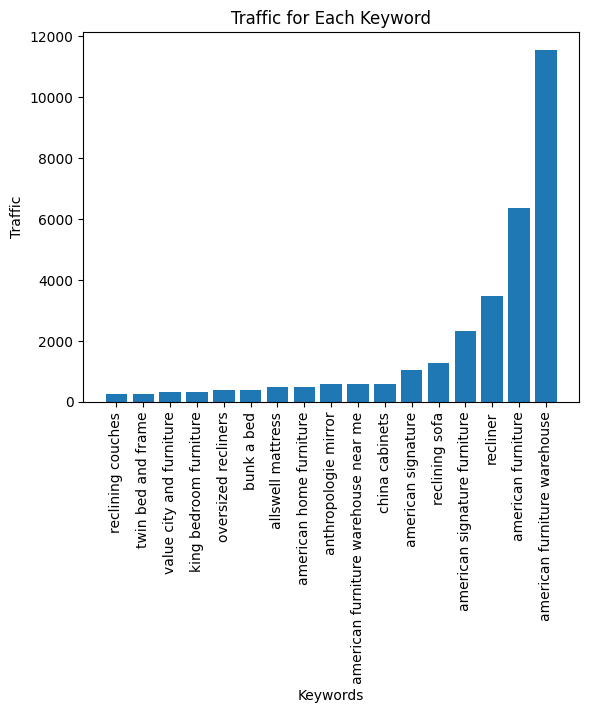

In [ ]:
df_traffic = df.loc['Traffic'].replace("", 0).sort_values()


plt.bar(df_traffic.index, df_traffic.astype(int))
plt.xticks(rotation='vertical')
plt.title('Traffic for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Traffic')

plt.show()

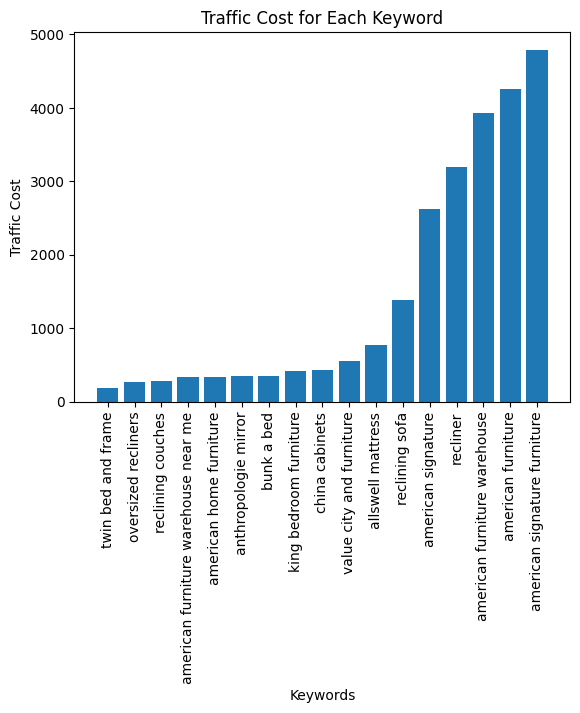

In [ ]:
df_traffic = df.loc['Traffic Cost'].replace("", 0).sort_values()

plt.bar(df_traffic.index, df_traffic.astype(int))
plt.xticks(rotation='vertical')
plt.title('Traffic Cost for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Traffic Cost')
plt.show()

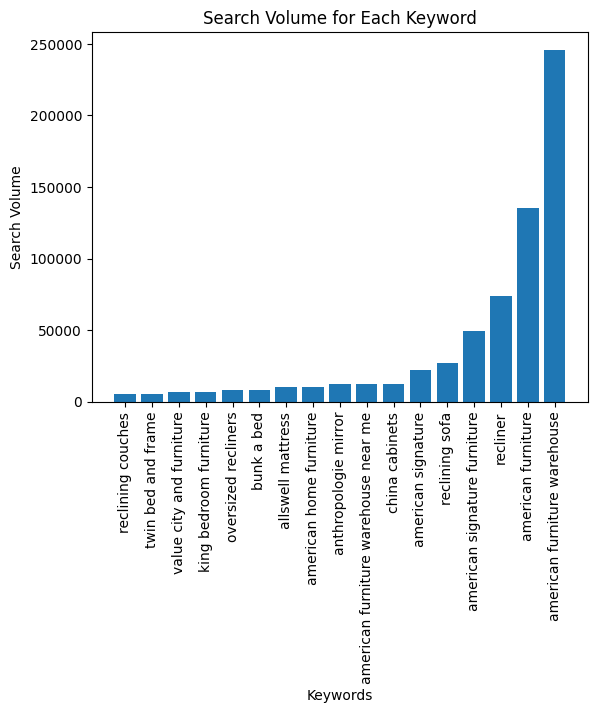

In [ ]:
df_traffic = df.loc['Search Volume'].replace("", 0).sort_values()

plt.bar(df_traffic.index, df_traffic.astype(int))
plt.xticks(rotation='vertical')
plt.title('Search Volume for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Search Volume')
plt.show()

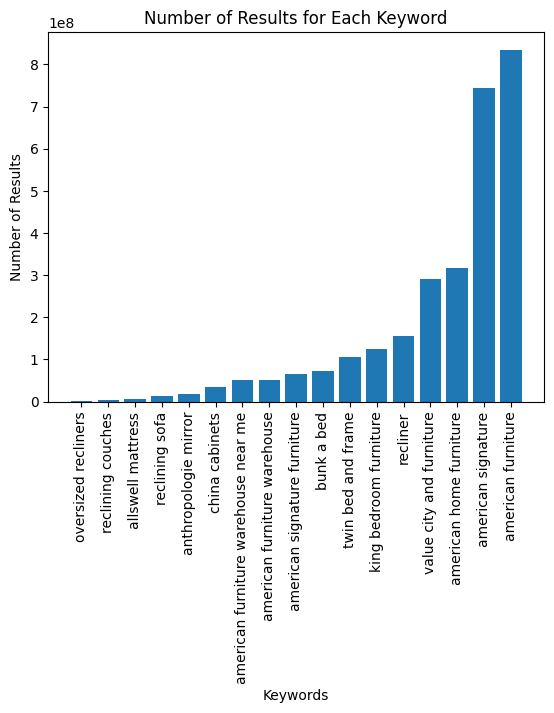

In [ ]:
df_traffic = df.loc['Number of Results'].replace("", 0).sort_values()

plt.bar(df_traffic.index, df_traffic.astype(int))
plt.xticks(rotation='vertical')
plt.title('Number of Results for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Number of Results')
plt.show()

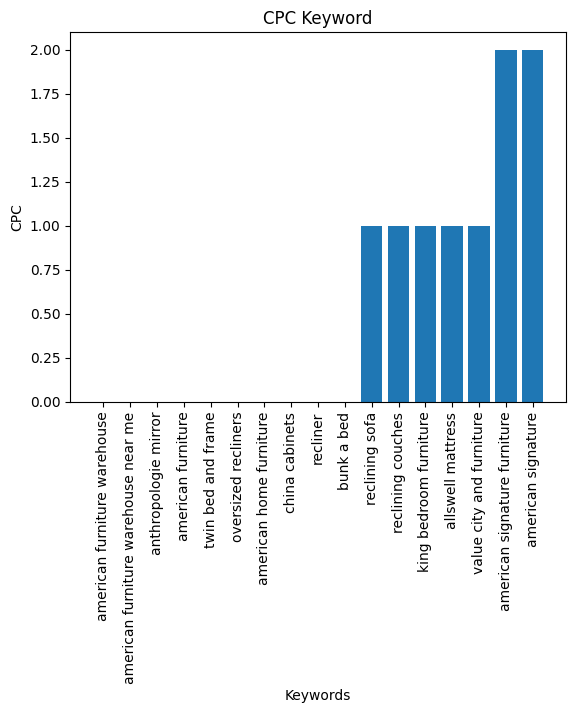

In [ ]:
df_traffic = df.loc['CPC'].replace("", 0).sort_values()

plt.bar(df_traffic.index, df_traffic.astype(int))
plt.xticks(rotation='vertical')
plt.title('CPC Keyword')
plt.xlabel('Keywords')
plt.ylabel('CPC')
plt.show()

Keyword            CPC  Traffic Cost
Keyword                             
CPC           1.000000      0.211726
Traffic Cost  0.211726      1.000000
p_value: 0.4146236247025433
0.21172563302264966


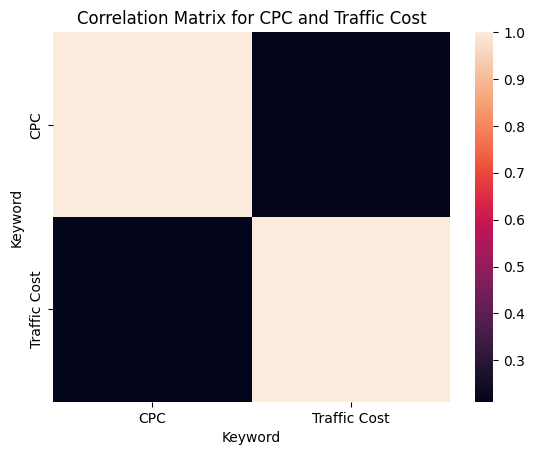

In [ ]:
df_correlation=df.T
metrics_df = df_correlation[['CPC', 'Traffic Cost']]
correlation_matrix = metrics_df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix for CPC and Traffic Cost")
df=df.replace('',0)
corr, p_value = pearsonr(df_correlation['CPC'], df_correlation['Traffic Cost'])
print('p_value:', p_value)
print(corr)

In [ ]:
ntsdf = df[-8:]
ntsdf_T = ntsdf.T
ntsdf_T


Keyword,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results
american furniture warehouse,246000.0,0.34,11562.0,25.57,3931.0,8.01,0.98,51600000.0
american furniture,135000.0,0.67,6345.0,14.03,4251.0,8.66,0.99,835000000.0
recliner,74000.0,0.92,3478.0,7.69,3199.0,6.51,1.00,156000000.0
american signature furniture,49500.0,2.06,2326.0,5.14,4791.0,9.76,0.98,64900000.0
reclining sofa,27100.0,1.09,1273.0,2.81,1387.0,2.82,1.00,12800000.0
american signature,22200.0,2.51,1043.0,2.30,2617.0,5.33,0.99,744000000.0
american furniture warehouse near me,12100.0,0.58,568.0,1.25,329.0,0.67,0.96,50800000.0
china cabinets,12100.0,0.76,568.0,1.25,431.0,0.87,1.00,35800000.0
anthropologie mirror,12100.0,0.61,568.0,1.25,346.0,0.70,1.00,17200000.0
american home furniture,9900.0,0.72,465.0,1.02,334.0,0.68,0.99,318000000.0


In [ ]:
ntsdf_T .corr()

Keyword,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results
Keyword,,,,,,,,
Search Volume,1.000000,-0.310261,1.000000,1.000000,0.738601,0.738735,-0.316960,0.215348
CPC,-0.310261,1.000000,-0.310232,-0.310266,0.211726,0.211679,0.023613,0.305651
Traffic,1.000000,-0.310232,1.000000,1.000000,0.738614,0.738747,-0.316955,0.215383
Traffic (%),1.000000,-0.310266,1.000000,1.000000,0.738638,0.738771,-0.316914,0.215342
Traffic Cost,0.738601,0.211726,0.738614,0.738638,1.000000,0.999999,-0.322472,0.424299
Traffic Cost (%),0.738735,0.211679,0.738747,0.738771,0.999999,1.000000,-0.322979,0.424383
Competition,-0.316960,0.023613,-0.316955,-0.316914,-0.322472,-0.322979,1.000000,-0.130976
Number of Results,0.215348,0.305651,0.215383,0.215342,0.424299,0.424383,-0.130976,1.000000


In [ ]:
spearman_corr = ntsdf_T.corr(method='spearman')
spearman_corr

Keyword,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results
Keyword,,,,,,,,
Search Volume,1.000000,-0.215168,1.000000,1.000000,0.794345,0.794345,-0.451947,0.201973
CPC,-0.215168,1.000000,-0.215168,-0.215168,0.296933,0.296933,0.114994,0.139877
Traffic,1.000000,-0.215168,1.000000,1.000000,0.794345,0.794345,-0.451947,0.201973
Traffic (%),1.000000,-0.215168,1.000000,1.000000,0.794345,0.794345,-0.451947,0.201973
Traffic Cost,0.794345,0.296933,0.794345,0.794345,1.000000,1.000000,-0.383305,0.370098
Traffic Cost (%),0.794345,0.296933,0.794345,0.794345,1.000000,1.000000,-0.383305,0.370098
Competition,-0.451947,0.114994,-0.451947,-0.451947,-0.383305,-0.383305,1.000000,-0.412364
Number of Results,0.201973,0.139877,0.201973,0.201973,0.370098,0.370098,-0.412364,1.000000


**Extra ASF Data - Search Volume Data 2021-2024**

In [21]:
from google.colab import auth
import gspread
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from google.auth import default

# Authenticate the Google account
auth.authenticate_user()

# Authorize access
creds, _ = default()
gc = gspread.authorize(creds)

# Use the link you provided to open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1Fno1zuwprUEWCBjBO_zbYcMyp0nW9miIyC0kgG8veOs/edit?gid=0#gid=0'

# Open the spreadsheet
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first worksheet
worksheet = spreadsheet.sheet1

# Get all the data and convert it to a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,Keyword,american furniture warehouse,american furniture,recliner,american signature furniture,reclining sofa,american signature,american furniture warehouse near me,china cabinets,anthropologie mirror,american home furniture,allswell mattress,bunk a bed,oversized recliners,king bedroom furniture,value city and furniture,twin bed and frame,reclining couches
0,January 2021,368000,246000,201000,110000,135000,90500,14800,74000,27100,22200,14800,368000,27100,135000,550000,165000,18100
1,February 2021,301000,201000,165000,90500,110000,74000,12100,49500,27100,18100,12100,301000,22200,110000,450000,110000,12100
2,March 2021,368000,246000,201000,110000,135000,74000,14800,60500,27100,22200,18100,368000,27100,135000,550000,165000,14800
3,April 2021,301000,246000,201000,90500,110000,60500,12100,49500,22200,18100,14800,246000,18100,90500,450000,135000,12100
4,May 2021,368000,246000,165000,90500,110000,60500,14800,49500,18100,18100,22200,246000,18100,90500,368000,110000,9900


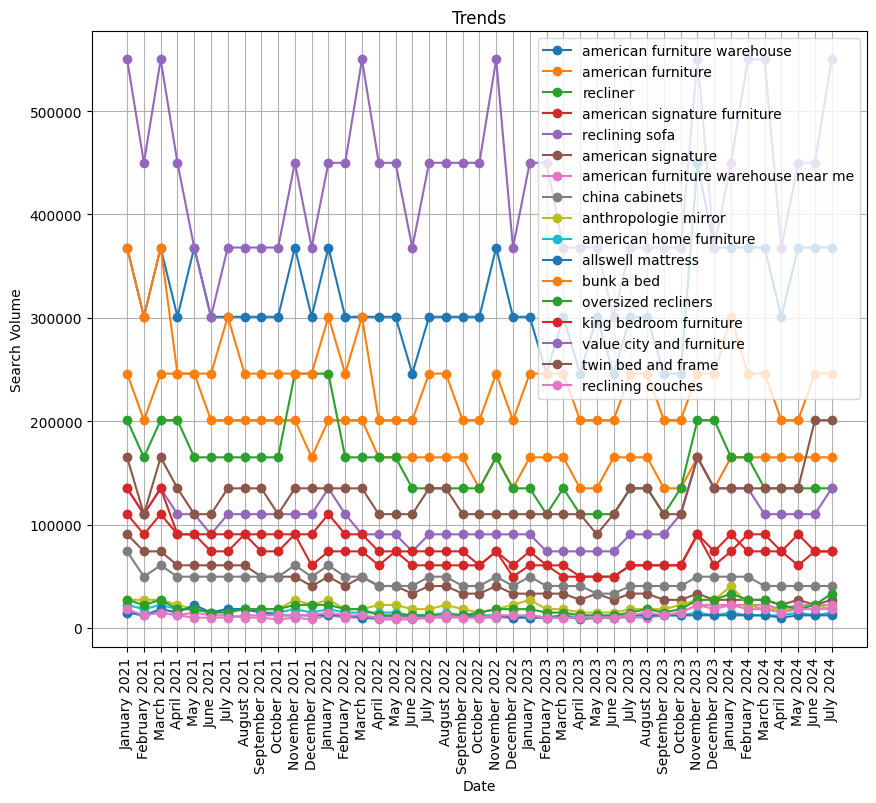

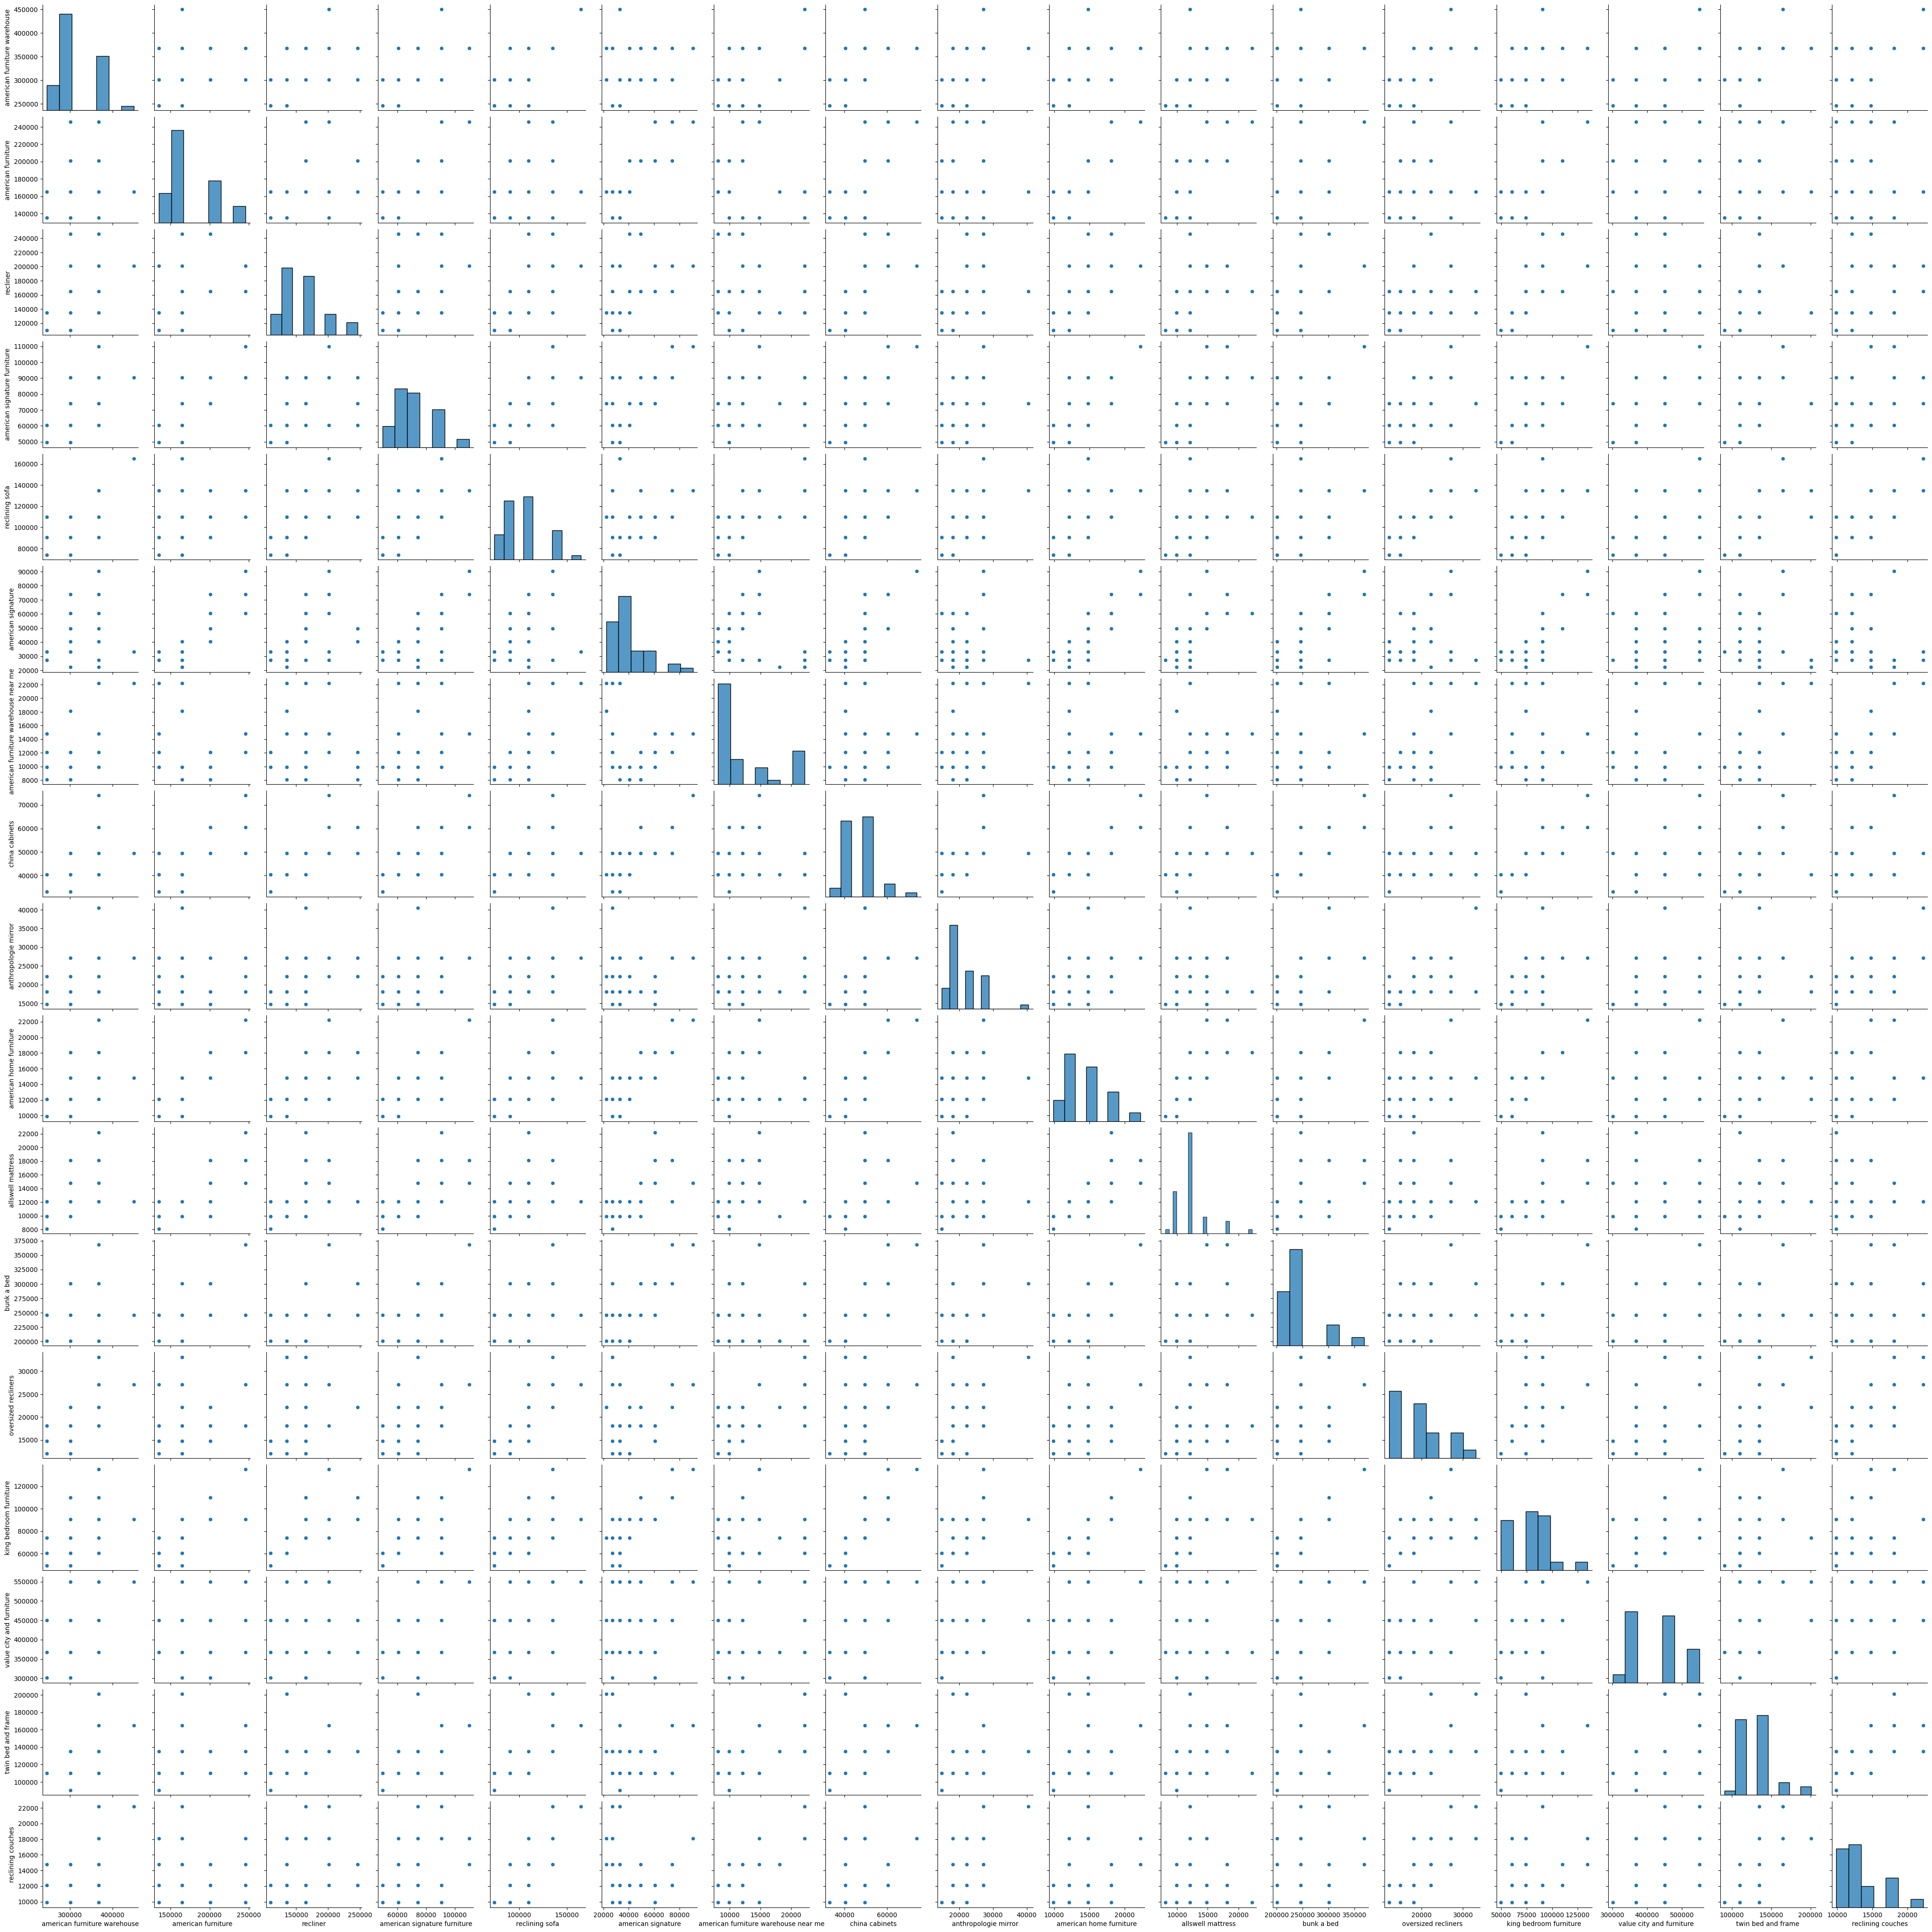

In [22]:
df.shape
df.columns
df.set_index('Keyword', inplace=True)
df_volume = df
df_volume.index

plt.figure(figsize=(10,8))
for x in df_volume.columns:
  plt.plot(df_volume.index, df_volume[x], label=x, marker='o')

plt.xlabel('Date')
plt.legend(fontsize='small')
plt.ylabel('Search Volume')
plt.title('Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()
df = df.replace('', 0)
sns.pairplot(df_volume)